#Headers

In [0]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Read Data Files

In [0]:
# csvfile = open("./stat.csv",'r') # data without 64
csvfile = open("./stat.csv",'r') # data with 64
reader = csv.reader(csvfile, delimiter=',', quotechar='|')

decimal = []
yijinecimal = []
next(reader, None)  # skip the headers

for row in reader:
  decimal.append(int(row[2]))
  yijinecimal.append(int(row[3]))

# Visualize Raw Data

## Linear Regression

intercept: 20295.193026948415
slope: 0.19128282648475672


Text(0.5, 1.0, '$R^2=$0.6870419415931065')

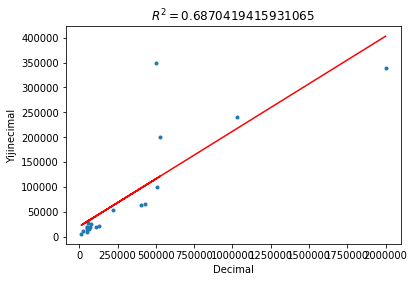

In [24]:
# apply linear regression
model = LinearRegression()
decimal_ = np.array(decimal).reshape((-1, 1))
model.fit(decimal_, yijinecimal)

r_sq = model.score(decimal_, yijinecimal)

yijinecimal_pred = model.predict(decimal_)

print('intercept:', model.intercept_)
print('slope:', model.coef_[0])

# plt figure
fig = plt.figure()
plt.plot(decimal, yijinecimal, '.')
plt.plot(decimal, yijinecimal_pred, 'r-')
plt.xlabel("Decimal")
plt.ylabel("Yijinecimal")
plt.title("$R^2=$"+str(r_sq))

## Logarithmic Representation

intercept: 0.4511135711735772
slope: 0.8544648539446336


Text(0.5, 1.0, '$R^2=$0.8911080821299132')

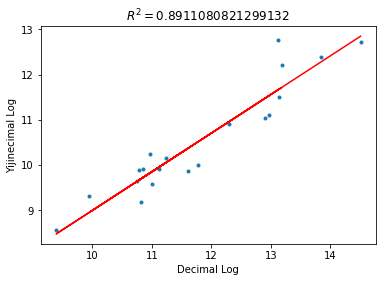

In [25]:
decimal_log = np.log(decimal)
yijinecimal_log = np.log(yijinecimal)

# apply linear on log data
model_log = LinearRegression()
decimal_log_ = np.array(decimal_log).reshape((-1, 1))
model_log.fit(decimal_log_, yijinecimal_log)

r_sq = model_log.score(decimal_log_, yijinecimal_log)

yijinecimal_log_pred = model_log.predict(decimal_log_)
print('intercept:', model_log.intercept_)
print('slope:', model_log.coef_[0])

# plt figure
fig = plt.figure()
plt.plot(decimal_log, yijinecimal_log, '.')
plt.plot(decimal_log, yijinecimal_log_pred, 'r-')
plt.xlabel("Decimal Log")
plt.ylabel("Yijinecimal Log")
plt.title("$R^2=$"+str(r_sq))

## MLP Regression

Text(0.5, 1.0, '$R^2=$0.7028058917664898')

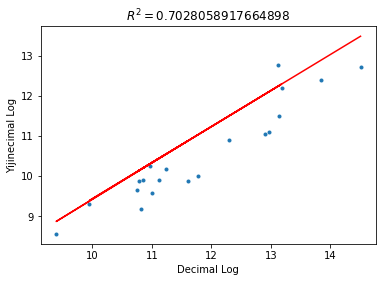

In [26]:
model_mlp = MLPRegressor(hidden_layer_sizes=(10,10,10),solver="adam", max_iter=99999999, activation="relu")
model_mlp.fit(decimal_log_, yijinecimal_log)
yijinecimal_mlp_pred = model_mlp.predict(decimal_log_)
r_sq = model_mlp.score(decimal_log_, yijinecimal_log)

# plt figure
fig = plt.figure()
plt.plot(decimal_log, yijinecimal_log, '.')
plt.plot(decimal_log, yijinecimal_mlp_pred, 'r-')
plt.xlabel("Decimal Log")
plt.ylabel("Yijinecimal Log")
plt.title("$R^2=$"+str(r_sq))